# Create a convolutional neural network (CNN)
model = tf.keras.quential([
    Cotf.keras.layers.nv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    Matf.keras.layers.xPooling2D(2, 2),
    Cotf.keras.layers.nv2D(64, (3, 3), activation='relu'),
    Matf.keras.layers.xPooling2D(2, 2),
    Cotf.keras.layers.nv2D(128, (3, 3), activation='relu'),
    Matf.keras.layers.xPooling2D(2, 2),
    Fltf.keras.layers.atten(),
    Detf.keras.layers.nse(128, activation='relu'),
    Detf.keras.layers.nse(len(clothing_names), activation='softmax')
])tf

In [2]:
#----------------------------IMPORTS----------------------------
import cv2
import numpy as np
import os
import random
import pickle
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
# path = 'D:\Senior II\Graduation Project\Datasets\Clothes\Dataset_1'
path = "D:\Work\CCE\Year 4 - Senior 2\Semester 1\Senior-2-Semester-1\GP\Graduation-Project\Clothes Description Module\Datasets\Dataset 1"
df = pd.read_csv(path + '/images.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Work\\CCE\\Year 4 - Senior 2\\Semester 1\\Senior-2-Semester-1\\GP\\Graduation-Project\\Clothes Description Module\\Datasets\\Dataset 1/images.csv'

In [ ]:
#Remove all entries with label = Not sure or label = Other
df = df[df['label'] != 'Not sure']
df = df[df['label'] != 'Other']
#Remove colums: sender_id and kids
df = df.drop(['sender_id', 'kids'], axis=1)
df.head()

,image,label
1,ea7b6656-3f84-4eb3-9099-23e623fc1018,T-Shirt
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa,T-Shirt
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0,Shoes
5,5d3a1404-697f-479f-9090-c1ecd0413d27,Shorts
6,b0c03127-9dfb-4573-8934-1958396937bf,Shirt


In [ ]:
#Extract the unique labels
class_names = df['label'].unique()
print(f'There are {class_names.shape[0]} unique classes')
class_ids = dict()
for i in range(len(class_names)):
    class_ids[class_names[i]] = i

There are 18 unique classes


In [ ]:
image_width = image_height = 100
total_images = 5000

In [ ]:
#Upload photos to a numpy array
images = []
images_labels = []
# for i in range(len(df['image'])):
for i in range(5000):
    #Check if df['image'][i] is in
    if (i in df['image'].keys()):
        img = cv2.imread(path + '/' + df['image'][i] + '.jpg')
        #Check if image is not None
        if (img is not None):
            images.append(cv2.resize(img, (image_width, image_height)))
            images_labels.append(class_ids[df['label'][i]])

m = int(len(images) * 0.8)
m_test = int(len(images) * 0.1)
m_validation = len(images) - m - m_test

x_train = np.array(images[:m + 1]).astype(float)
y_train = np.array(images_labels[:m + 1])

x_test = np.array(images[m + 1:m + m_test + 1]).astype(float)
y_test = np.array(images_labels[m + 1:m + m_test + 1])

x_validation = np.array(images[m + m_test + 1:]).astype(float)
y_validation = np.array(images_labels[m + m_test + 1:])


This image is of a Ankle boot


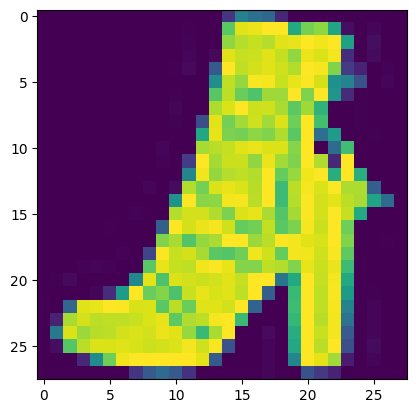

In [5]:
#Show an image from x_train
index = 11
plt.imshow(x_train[index].astype(np.uint8))
print(f'This image is of a {class_names[y_train[index]]}')
plt.show()

In [46]:
#Number of training examples
m = x_train.shape[0]
m_test = x_test.shape[0]

#Reshape the training and test examples
# x_train = x_train.reshape(m, -1)
# x_test = x_test.reshape(m_test, -1)

print(f'x_train.shape = {x_train.shape}')
print(f'y_train.shape = {y_train.shape}')
print(f'x_test.shape = {x_test.shape}')
print(f'y_test.shape = {y_test.shape}')
print(f'x_validation.shape = {x_validation.shape}')
print(f'y_validation.shape = {y_validation.shape}')

x_train.shape = (3778, 100, 100, 3)
y_train.shape = (3778,)
x_test.shape = (472, 100, 100, 3)
y_test.shape = (472,)
x_validation.shape = (472, 100, 100, 3)
y_validation.shape = (472,)


In [58]:
# Create a convolutional neural network (CNN)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape = (image_height, image_height, 3), name = 'Conv1'),
    tf.keras.layers.MaxPooling2D(2, 2, name = 'Max1'),
    tf.keras.layers.Conv2D(64, (5, 5), padding = 'same', activation='relu', name = 'Conv2'),
    tf.keras.layers.MaxPooling2D(2, 2, name = 'Max2'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', name = 'Conv3'),
    tf.keras.layers.MaxPooling2D(2, 2, name = 'Max3'),
    tf.keras.layers.Conv2D(512, (5, 5), strides = 2, activation='relu', name = 'Conv4'),
    tf.keras.layers.MaxPooling2D(2, 2, name = 'Max4'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), name = 'Dense1'),    
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), name = 'Dense2'),    
    tf.keras.layers.Dense(len(class_names), activation='linear', name = 'Dense3')
])

# Compile the model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [59]:
# Train the model on the training data
history = model.fit(x_train[:100], y_train[:100], epochs=20, batch_size=30, validation_data=(x_validation, y_validation))

Epoch 1/20
4/4 [==============================] - 6s 1s/step - loss: 26.1769 - accuracy: 0.0800 - val_loss: 20.9102 - val_accuracy: 0.1123
Epoch 2/20
4/4 [==============================] - 4s 1s/step - loss: 18.9979 - accuracy: 0.1400 - val_loss: 14.1966 - val_accuracy: 0.2140
Epoch 3/20
4/4 [==============================] - 4s 983ms/step - loss: 14.0055 - accuracy: 0.2400 - val_loss: 13.9686 - val_accuracy: 0.1356
Epoch 4/20
4/4 [==============================] - 4s 981ms/step - loss: 13.0727 - accuracy: 0.1800 - val_loss: 13.5164 - val_accuracy: 0.1144
Epoch 5/20
4/4 [==============================] - 4s 995ms/step - loss: 12.3405 - accuracy: 0.3100 - val_loss: 12.7829 - val_accuracy: 0.1229
Epoch 6/20
4/4 [==============================] - 3s 950ms/step - loss: 12.0756 - accuracy: 0.3400 - val_loss: 12.5159 - val_accuracy: 0.1758
Epoch 7/20
4/4 [==============================] - 4s 1s/step - loss: 11.7419 - accuracy: 0.4500 - val_loss: 12.3776 - val_accuracy: 0.1843
Epoch 8/20
4/4 

In [56]:
_, train_accuracy = model.evaluate(x_train[:50], y_train[:50])
_, test_accuracy = model.evaluate(x_test, y_test)
print("Train Accuracy = %.2f" % (train_accuracy*100),'% with', m, 'training examples')
print("Test Accuracy = %.2f" % (test_accuracy*100),'% with', m_test, 'test examples')

15/15 [==============================] - 2s 148ms/step - loss: 12.6795 - accuracy: 0.2542
Train Accuracy = 100.00 % with 3778 training examples
Test Accuracy = 25.42 % with 472 test examples


In [57]:
#Delete previous model
del model

1/1 [==============================] - 0s 27ms/step
Prediction: Shoes
Correct


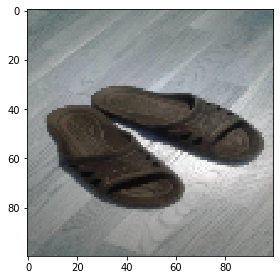

In [ ]:
index = 26
prediction = model.predict(x_train[np.newaxis, index])
print('Prediction: ' + class_names[np.argmax(prediction)])
if (np.argmax(prediction) == y_train[index]):
    print('Correct')
else:
    print('Incorrect')
io.imshow(x_train[index].astype(np.uint8))
io.show()

In [ ]:
train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)
train_count_correct = 0
test_count_correct = 0
for i in range(m):
    predicted = np.argmax(train_predictions[i])
    if (predicted == y_train[i]):
        train_count_correct += 1
train_accuracy = train_count_correct / m

for i in range(m_test):
    predicted = np.argmax(test_predictions[i])
    if (predicted == y_test[i]):
        test_count_correct += 1
test_accuracy = test_count_correct / m_test

print("Train Accuracy = %.2f" % (train_accuracy*100),'% with', m, 'training examples')
print("Test Accuracy = %.2f" % (test_accuracy*100),'% with', m_test, 'test examples')


In [ ]:
#Plot loss vs epochs
plt.plot(history.history['loss'])
plt.show()

In [ ]:
# Save the trained model
pickle.dump(model, open('clothing_detector.pkl', 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\conv2d_2
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...layers\max_pooling2d_2
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........23
.........24
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                   

In [ ]:
# Plot a summary of your model's architecture
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
model.summary()

In [ ]:
#Delete previous model
del model